<a href="https://colab.research.google.com/github/July-to-me/Human_Resources_Dataset/blob/main/Salifort_Motors_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


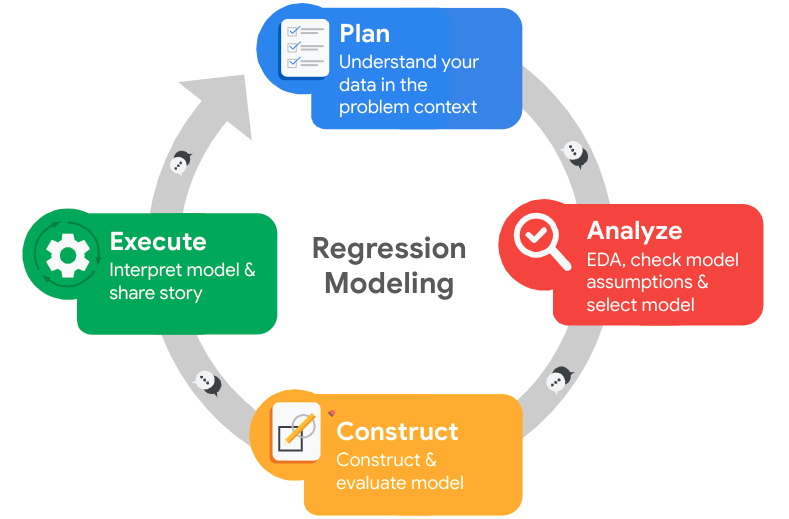

## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from google.colab import drive

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

# metrics to consider
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### Setting up directory and file path


In [5]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
file_path = '/content/drive/MyDrive/HR_capstone_dataset.csv'

### Load dataset

In [7]:
# RUN THIS CELL TO IMPORT YOUR DATA.
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [8]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


what we can do is tranform the department and salary columns into categorical data.

this way we can create a much better model to predict an employee leaving

### Gather descriptive statistics about the data

In [9]:
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

Seeing the distribution for numeric values

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Making all lowercase so I don't have to hit shift all the time.

Creating a new column known as cat_hours. I want to use this column for graphs and probably use it as a categorical variable for more regression stuff.

In [14]:
## Creating categorical data for average_monthly_hours
def f(row):
  if row['average_monthly_hours'] < 199:
    val = 'part-time'
  elif row['average_monthly_hours'] < 200:
    val = 'full-time'
  else:
    val = 'overtime'
  return val

df0['cat_hours'] = df0.apply(f, axis = 1)

Anything that is 40+ hours is considered to be overtime according to https://www.dol.gov/agencies/whd/overtime. That is why i made it if the variable is past 200, then it is overtime.

In [15]:
df0.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  \
0       3              0     1                      0      sales     low   
1       6              0     1                      0      sales  medium   
2       4              0     1                      0      sales  medium   
3       5              0     1                      0      sales     low   
4       3              0     1                      0      sales     low   

   cat_hours  
0  part-time  
1   overtime  
2   overtime  
3   overtime  
4  part-time

### Check missing values

Check for any missing values in the data.

In [16]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
cat_hours                0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [17]:
# Check for duplicates
df0.duplicated().sum()


3008

about 20% of the data is duplicated. We can create a new dataframe for this to do more analysis for later

In [19]:
df0_duplicated = df0[df0.duplicated() == True]


We can see that the first five entries are rather identical. We can see what kind of unique entries are inside of the duplicated dataframe.

In [23]:
unique_counts = df0_duplicated.nunique()
unique_counts.head()

satisfaction_level        92
last_evaluation           65
number_project             6
average_monthly_hours    207
tenure                     8
dtype: int64

We can see that

In [24]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  \
0       3              0     1                      0      sales     low   
1       6              0     1                      0      sales  medium   
2       4              0     1                      0      sales  medium   
3       5              0     1                      0      sales     low   
4       3              0     1                      0      sales     low   

   cat_hours  
0  part-time  
1   overtime  
2   overtime  
3   overtime  
4  part-time

### Check outliers

Check for outliers in the data.

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig = px.box(df1, x = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident', 'promotion_last_5years'],
             title="Seeing Outliers")
fig.show()


We can see that there are some outliers when it comes to the tenure variable. What we can do is to churn it so we can do a logistic regression

We can investigate the tenure variable a little more in order to see the distribution of each tenure based on the department to see how skwed it is for the department

In [ ]:
# Seeing boxplot distribution amongst company department
tenure_department = df1.groupby(['department', 'tenure']).size().reset_index(name= 'count')

print(tenure_department)

fig = px.box(df1, x="tenure", color="department")
fig.show()

   department  tenure  count
0          IT       2    239
1          IT       3    420
2          IT       4    162
3          IT       5     94
4          IT       6     42
..        ...     ...    ...
69  technical       5    197
70  technical       6    114
71  technical       7      1
72  technical       8      5
73  technical      10     10

[74 rows x 3 columns]


I am surpised that most of the boxplots are somewhat similar in length, but we can see that human resources (HR) and support does have a unique boxplots compared to the others.

In [30]:
satisfaction_department = df1.groupby(['department', 'satisfaction_level']).size().reset_index(name= 'count')

print(satisfaction_department)

fig = px.box(df1, x='department', y='satisfaction_level', color='left')
fig.show()

    department  satisfaction_level  count
0           IT                0.09     10
1           IT                0.10     19
2           IT                0.11     17
3           IT                0.12      3
4           IT                0.14      5
..         ...                 ...    ...
895  technical                0.96     29
896  technical                0.97     31
897  technical                0.98     28
898  technical                0.99     28
899  technical                1.00     24

[900 rows x 3 columns]


I think we have to look into more in the HR and management since we do see a few of the outliers in here.

In [ ]:
# saving the HR and management outliers to do more EDA
hr_df = df1[df1['department'].isin(['hr', 'management'])]
print(hr_df)

In [33]:
# Determine the number of rows containing outliers

# Getting 25th percentile value in tenure column
per25 = df1['tenure'].quantile(0.25)

# Getting 75th percentile value in tenure
per75 = df1['tenure'].quantile(0.75)

# getting iqr
iqr = per75 - per25

# defining upper and lower limit
upper = per75 + 1.5*iqr
lower = per25 - 1.5*iqr
print("Lower limit of Tenure is:", lower)
print("Higher limit of Tenure is:", upper)

# Identify subset of data containing outliers in tenure
outliers = df1[(df1['tenure'] > upper)| (df1['tenure'] < lower)]

# Counting rows in data containing outliers in tenure
print('Number of rows in the data containing outliers in tenure', len(outliers))

Lower limit of Tenure is: 1.5
Higher limit of Tenure is: 5.5
Number of rows in the data containing outliers in tenure 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

In [34]:
df1['tenure'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: tenure, dtype: int64

In [35]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [36]:
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [37]:
df1['promotion_last_5years'].value_counts()
# I have feeling that this is going to be one of the most important indicators of why people leave.

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [ ]:
# creating a new column based on categorizing hours
# will do one that is less than 150 hours
# another that is 151-200
# the last one is 201+

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [ ]:
# Create a plot as needed
df1.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  \
0       3              0     1                      0      sales     low   
1       6              0     1                      0      sales  medium   
2       4              0     1                      0      sales  medium   
3       5              0     1                      0      sales     low   
4       3              0     1                      0      sales     low   

              cat_hours         bins  retention_rate  attrition_rate  
0             part-time  (0.5, 0.75]        0.833959        0.166041  
1  full-time + overtime  (0.75, 1.0]        0.833959        0.166041  
2  full-time + overtime  (0.75, 1.0]        0.833959        0.166041  
3  full-time + overtime  (0.75, 1.0]        0.833959        0.166041  
4             part-time  (0.5, 0.75]        0.833959        0.166041

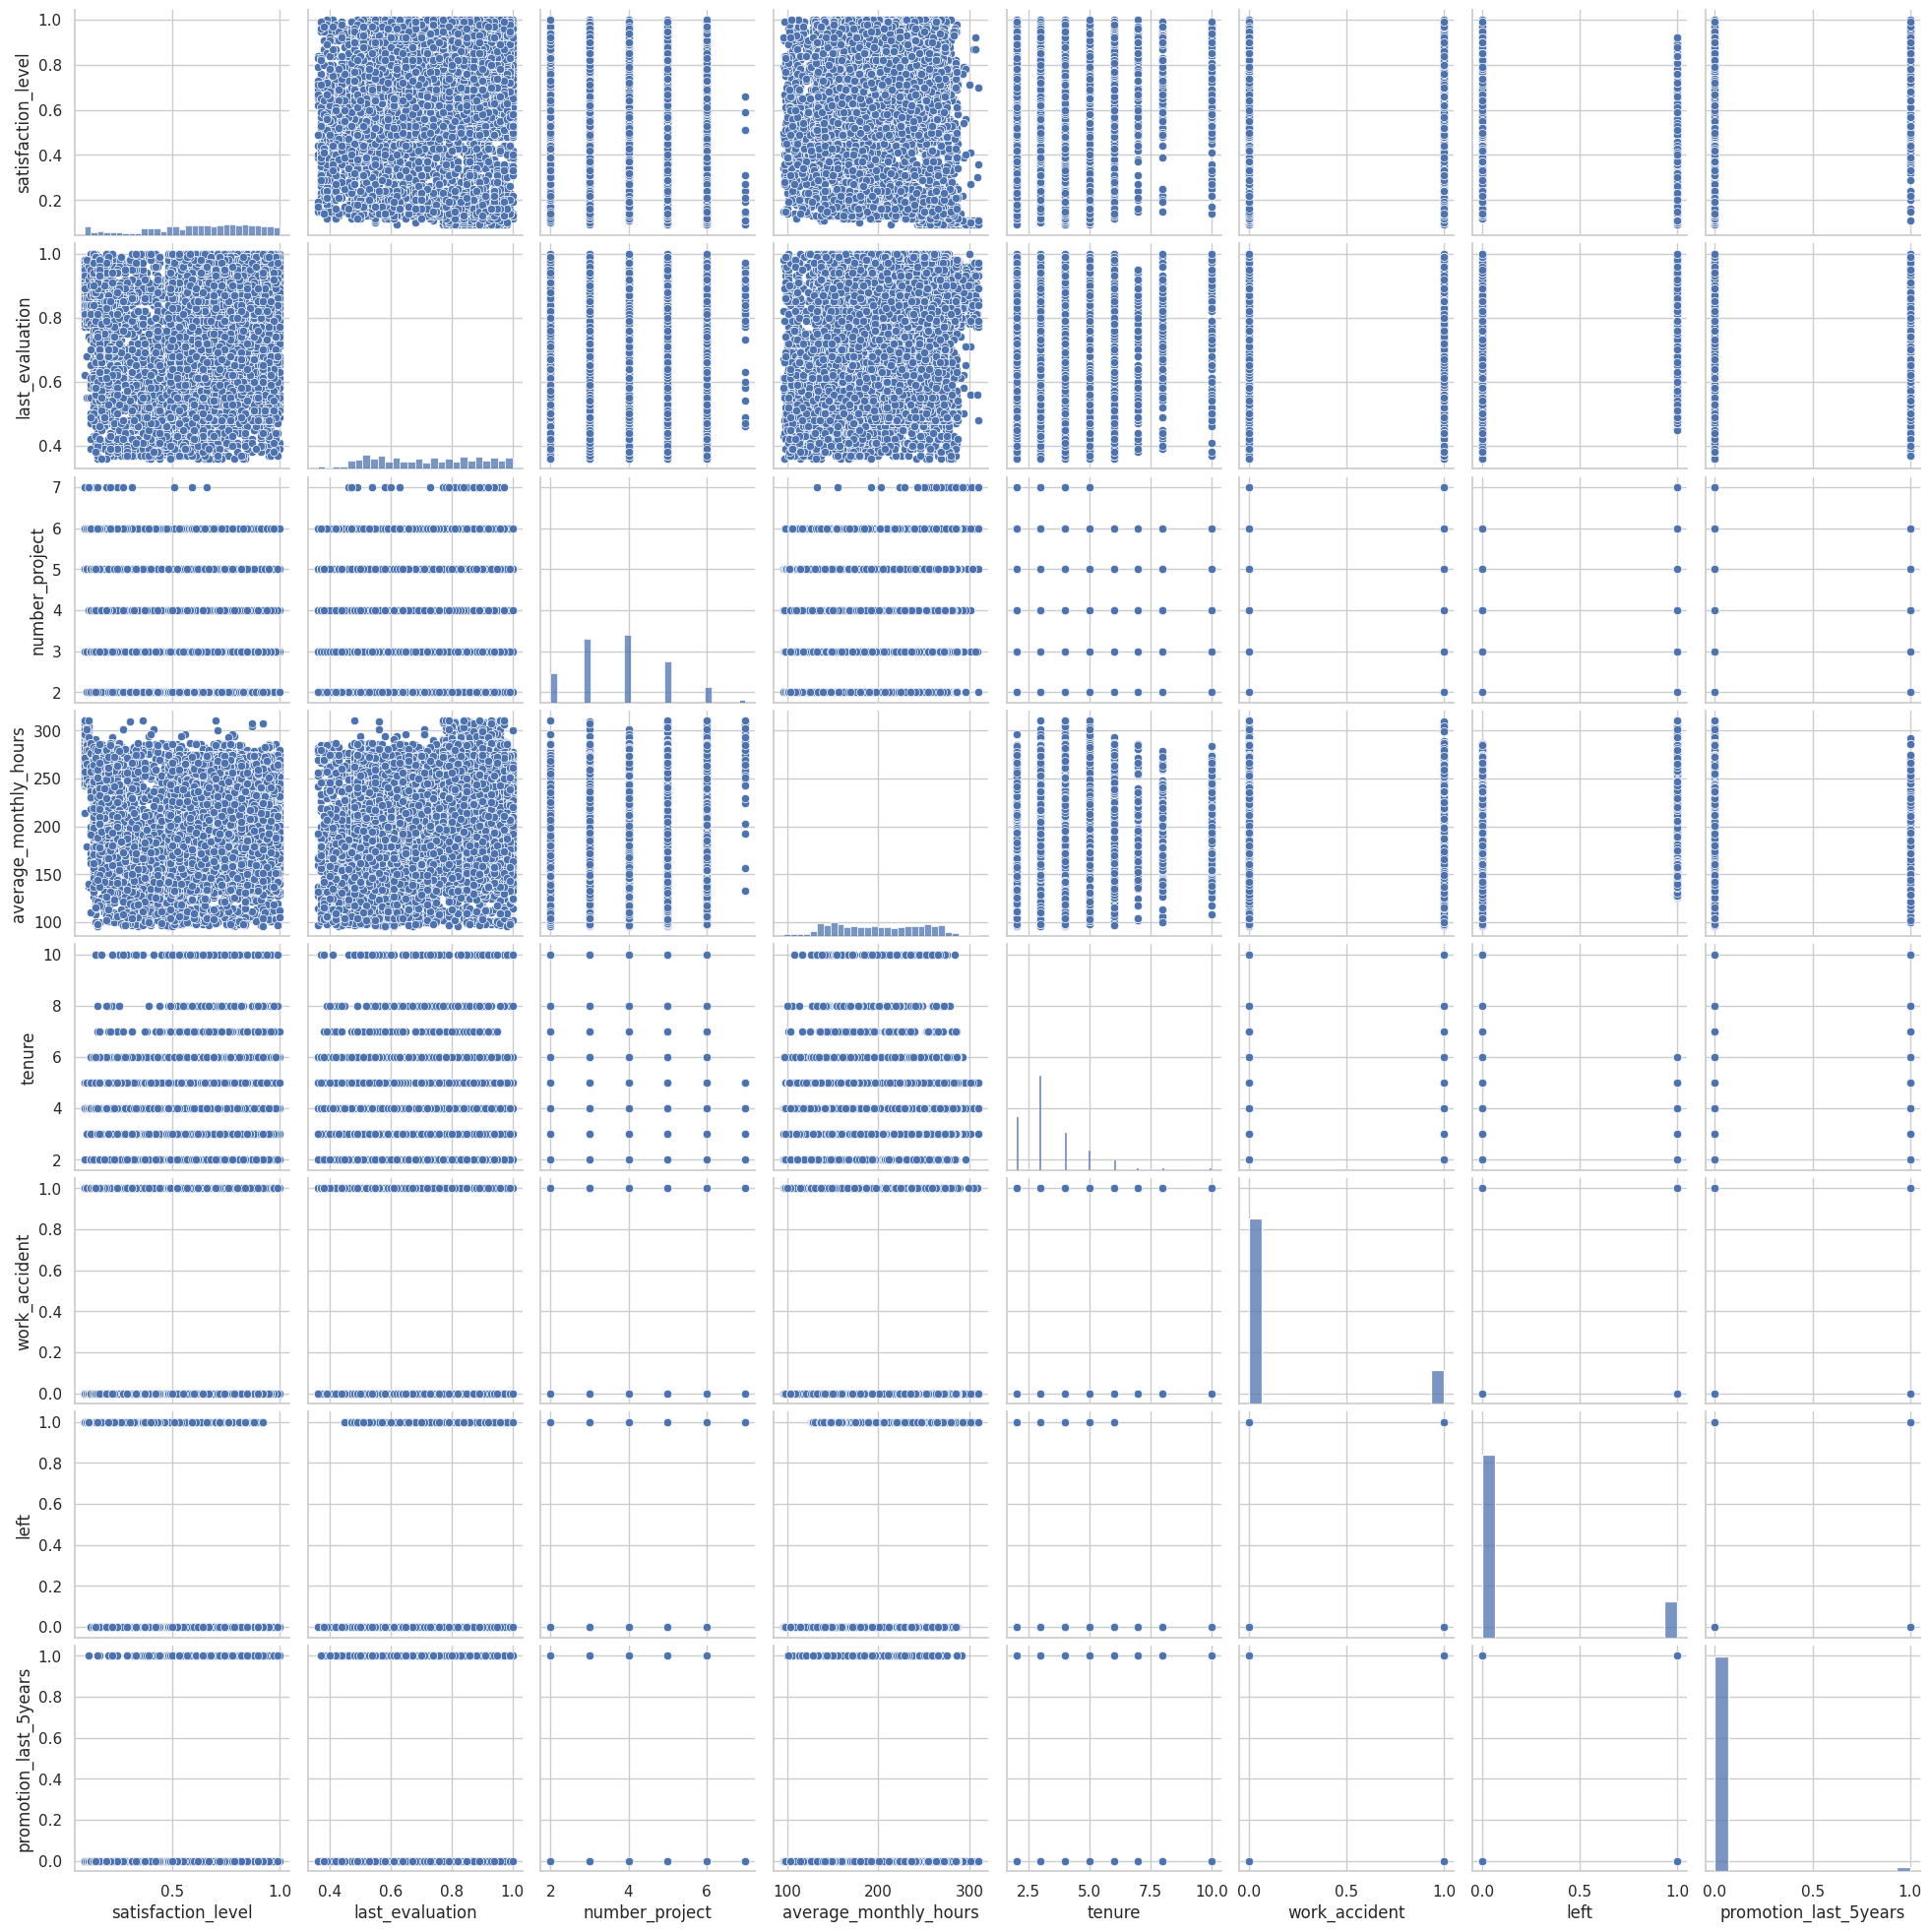

In [ ]:
# Creating a pairplot of the data to see any abnormal stuff
sns.pairplot(df1)

<ipython-input-42-2c127f17db5f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-42-2c127f17db5f>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



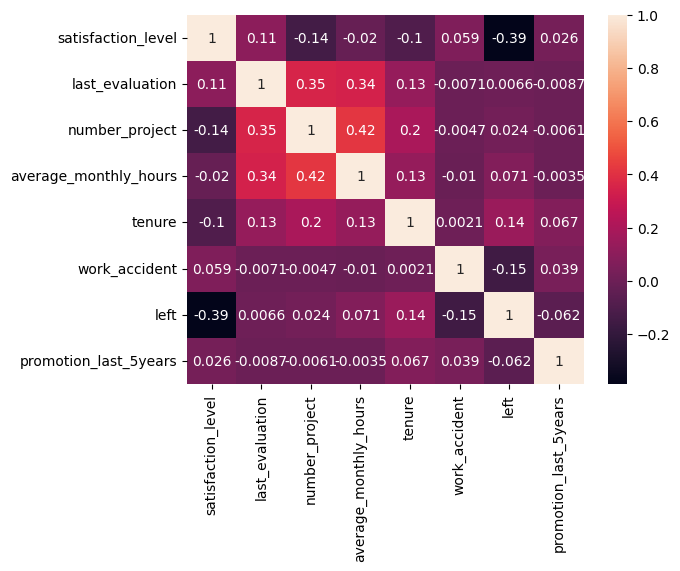

In [42]:
# creating a corrheatmap (with the outliers) in order to see if it was beneficial to remove those outliers
corr1 = df0.corr()
plt.figure()
sns.heatmap(df0.corr(), annot=True)
plt.show()

<ipython-input-43-b777ac67fe55>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-43-b777ac67fe55>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



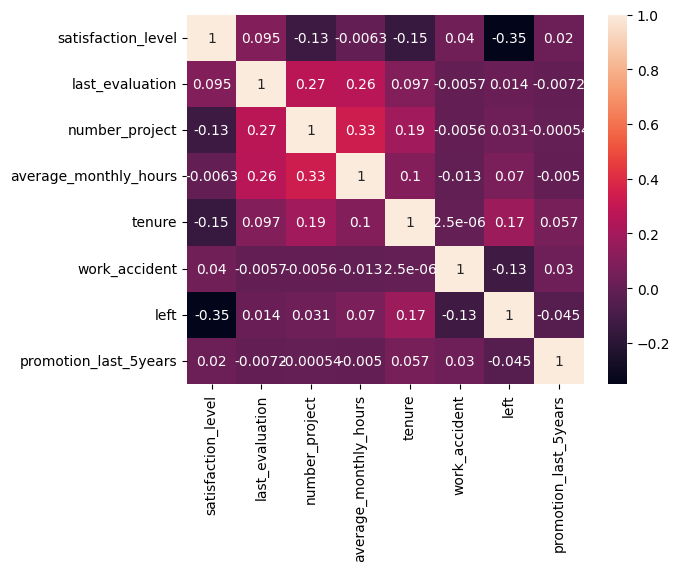

In [43]:
# creating a corrheatmap is benefical in order to see what to investigate more
corr2 = df1.corr()
plt.figure()
sns.heatmap(df1.corr(), annot=True)
plt.show()

We can see a relative change in difference when it comes to the correlation plots before and after the removing the outliers. What we can do is convert both of them into a dataframe and compare the changes like so!

In [49]:
corr_diff_per.dtypes()

TypeError: ignored

In [52]:
# transforming corr plots into dataframes
corr1_df = pd.DataFrame(corr1)
corr2_df = pd.DataFrame(corr2)

# calculating difference in correlation matrices
corr_diff_per = 100*(corr2_df - corr1_df)
row_averages = corr_diff_per.mean(axis=1)
sum_row_averages = row_averages.sum()

print(corr_diff_per)


                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               0.000000        -0.983526        0.972330   
last_evaluation                 -0.983526         0.000000       -7.907647   
number_project                   0.972330        -7.907647        0.000000   
average_monthly_hours            1.379576        -7.506425       -8.569427   
tenure                          -5.204932        -3.476212       -0.794884   
work_accident                   -1.875694         0.140891       -0.087185   
left                             3.781656         0.695278        0.714046   
promotion_last_5years           -0.581597         0.147740        0.551988   

                       average_monthly_hours    tenure  work_accident  \
satisfaction_level                  1.379576 -5.204932      -1.875694   
last_evaluation                    -7.506425 -3.476212       0.140891   
number_project                     -8.569427 -0.794884      -0.087185   
avera

In [53]:
print(sum_row_averages)

-6.581522754547432


We can see based on the correlation heatmap, we should investigate the effects of the number of projects employees do with the consideration of last_evaluations. As well as seeing average_monthly_hours with number of projects. We can see that there is a negative correlation amongst the sastifcation_level vs the employees that left. We can see that out of all variables, the least correlation for left is the promotion_last_5years (with -0.045).

We can see that after removing the outliers, we can see an overall -6.58% change in the correlation plot. What we can conclude is that the change of removing the outliers was a good step in seeing the difference between the correlation plot before and after removing the outliers.

We can now test for the Variance Inflation Factor. This will let us measure the behavior of a independent variable based on its correlation within another independent variable. This is a way to help us see multicollinarity with a particular independent variable

In [54]:
numerical_col = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours',
                 'work_accident', 'promotion_last_5years']
vif_df = df1[numerical_col]

vif = pd.DataFrame()
vif["Variable"] = vif_df.columns
vif["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]

# Display the result
print(vif)

                Variable        VIF
0     satisfaction_level   6.712326
1        last_evaluation  17.948570
2         number_project  12.857840
3  average_monthly_hours  17.288272
4          work_accident   1.180984
5  promotion_last_5years   1.018313


The way to interpret this vif is see that values that closer to 0 are normally not correlated, while values that are greater will be highly correlated (generally, a VIF above 5 indicates a high multicollinearity). With this, we can see that average_monthly_hours, last_evaluation, and number_projects are the variables that are express strong multicollinearity with other variables. This will help us create a regression analysis for later.

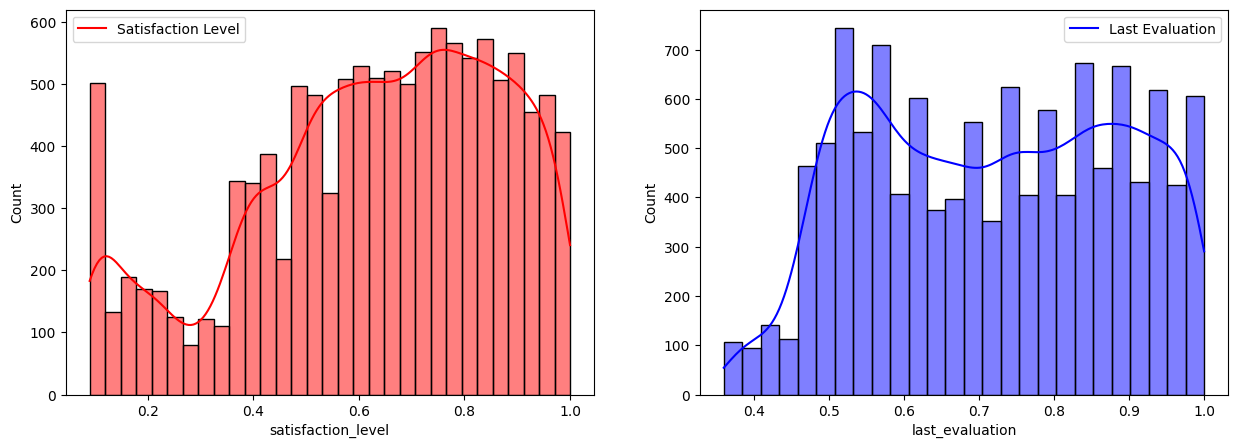

In [55]:
# displaying various histographs in order to see what we can investigate

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.histplot(df1['satisfaction_level'], kde= True, ax = axes[0], color= 'red')
sns.histplot(df1['last_evaluation'], kde= True, ax = axes[1], color= 'blue')

axes[0].legend(labels = ['Satisfaction Level'])
axes[1].legend(labels = ['Last Evaluation'])

plt.show()

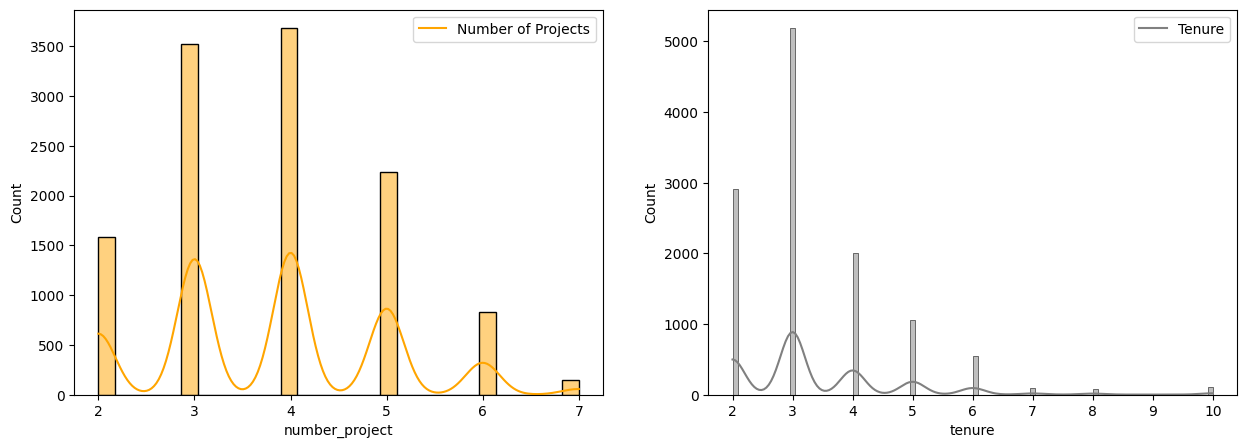

In [56]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.histplot(df1['number_project'], kde= True, ax = axes[0], color= 'orange')
sns.histplot(df1['tenure'], kde= True, ax = axes[1], color= 'grey')

axes[0].legend(labels = ['Number of Projects'])
axes[1].legend(labels = ['Tenure'])

plt.show()

I tried creating different histogram plots because we can see that number of projects, and the tenure variables contains a similar range of numbers. While we can see that sastifaction level and last evaluations are in that similar range to one another.

In [58]:
# Histogram for average_monthly_hours for left
import plotly.express as px
fig = px.histogram(df1, x="average_monthly_hours", color="left")
fig.show()

Employees who worked more than 220 average monthly hours have left the firm, and the employees that averaged 150 hours are the ones may have not left.

Text(0.5, 1.0, 'Number of Projects of People Leaving Due to Projects')

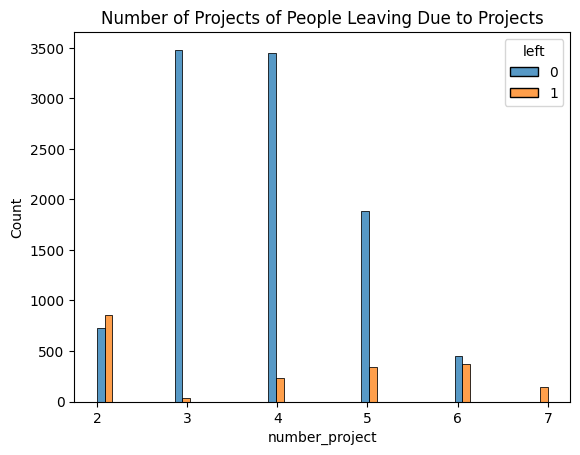

In [59]:
# Creating a boxplot showing the amount of monthly hours worked, based on who left
# and showing the colors of each department

sns.histplot(data=df1, x = 'number_project', hue= 'left', multiple='dodge')
plt.title('Number of Projects of People Leaving Due to Projects')

We can now do number_project with tenure. I would like to see what kind of people are getting 7 projects, as well as 2 projects. This is because both are in different extremes, and maybe we can see if there is a trend why are people leaving when they are given 2 or 7 projects.

We can try to plot it via a boxplot to see how the distribution is in this.

In [62]:
fig = px.box(df1, x="number_project", color = 'left')
fig.show()

In [60]:
fig = px.box(df1, y="tenure", x="number_project")
fig.show()

What suprises me the most is the idea that people who have a tenure of 10 years do not have 7 projects to juggle with.

salary  left
high    0        7.855892
        1        0.400300
low     0       38.078559
        1        9.790676
medium  0       37.461429
        1        6.413143
Name: left, dtype: float64


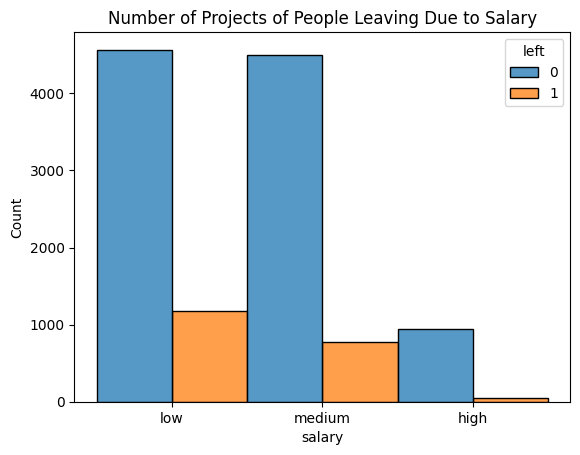

In [68]:
# We can do a simple distribution of salary and left
# This will show us the difference of salaries of those who stayed and those who left
sns.histplot(data=df1, x = 'salary', hue= 'left', multiple='dodge')
plt.title('Number of Projects of People Leaving Due to Salary')

salary_counts = df1['salary'].value_counts()


# calculating the percentages of the graph
salary_perc = ((df1.groupby('salary')['left'].value_counts()) * 100)/sum(salary_counts)
print(salary_perc)

I was expecting the low salary people will leave the company. It is not suprising since money is a huge factor for everyone. What I am suprised is the amount of people that left with high salary, since one will assume the higher the salary, the harder it is to leave the job.

cat_hours  left
full-time  0        0.567092
           1        0.008340
overtime   0       41.014094
           1        9.015095
part-time  0       41.814694
           1        7.580686
Name: left, dtype: float64


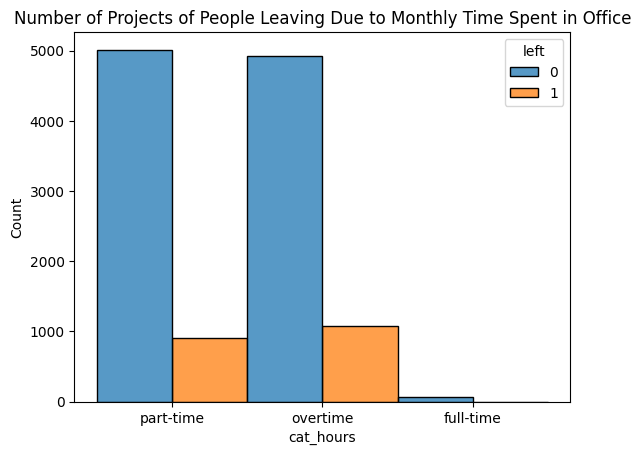

In [69]:
# We can do a simple distribution of average hours spent montly and left
# This will show us the difference of salaries of those who stayed and those who left
category_order = ['part-time', 'full-time', 'full-time + overtime']
u
sns.histplot(data=df1, x = 'cat_hors', hue= 'left', multiple='dodge')
plt.title('Number of Projects of People Leaving Due to Monthly Time Spent in Office')


cat_counts = df1['cat_hours'].value_counts()


# calculating the percentages of the graph
cat_perc = ((df1.groupby('cat_hours')['left'].value_counts()) * 100)/sum(cat_counts)
print(cat_perc)


We can see that there is a distribution going on with the data. We can see that between 110-160ish, there is a noticable amount of people leaving. We can also see this around the 220-260hour range. The other thing that is notiable is how once the 290+ hours mark hits, we can see all employees leaving the organization.

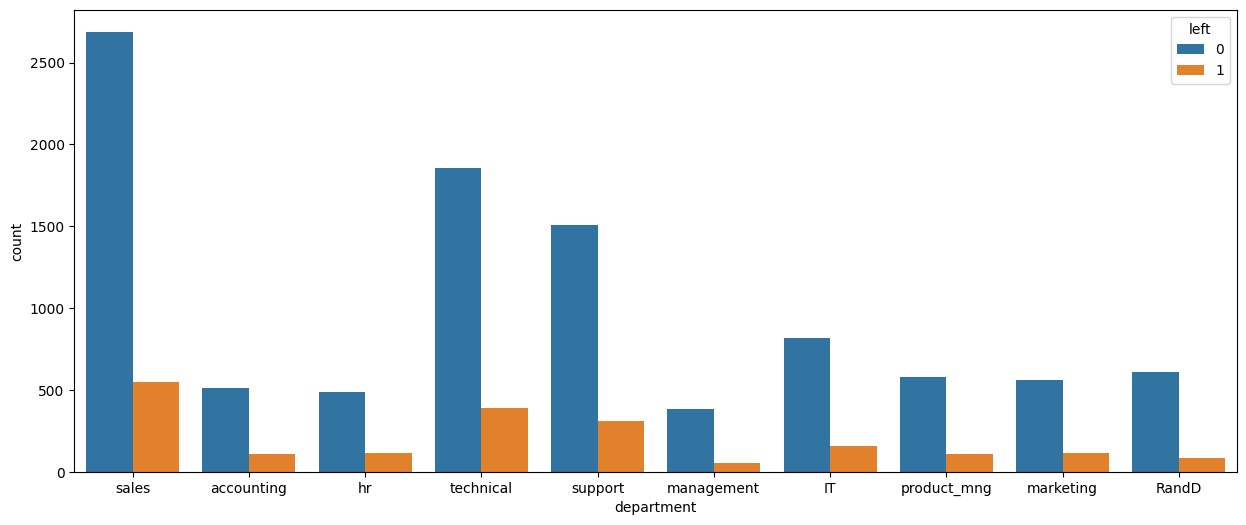

In [ ]:
# plot based on department vs people leaving


sns.countplot(data= df1, x='department', hue= 'left')
plt.gcf().set_size_inches(15, 6)
plt.show()

In [ ]:
# we can also graph the sastifaction level of each department
fig = px.box(df1, x="department", y= 'satisfaction_level' ,color="left")
fig.show()

Human resources, and management have some outliers that can be worth looking into. Perhaps we can create a new dataframe and create an analysis on HR and management seperately. Another thing to consider is how different technical,

In [ ]:
left_promo = df1[(df1.left == 1) & (df1.promotion_last_5years == 1)].groupby('tenure').size().rename('Promoted and Left')

left_no_promo = df1[(df1.left == 1) & (df1.promotion_last_5years ==0)].groupby('tenure').size().rename('Not Promoted and Left')

stayed_promo = df1[(df1.left == 0) & (df1.promotion_last_5years == 1)].groupby('tenure').size().rename('Promoted and Stayed')

stayed_no_promo = df1[(df1.left == 0) & (df1.promotion_last_5years == 0)].groupby('tenure').size().rename('Not Promoted and Stayed')

left = pd.concat((left_promo, left_no_promo), axis = 1, join = 'outer')

stayed = pd.concat((stayed_promo, stayed_no_promo), axis = 1, join = 'outer')

tenure_df = pd.concat((left,stayed), axis = 1, join = 'outer')

tenure_promo = px.bar(
    tenure_df,
    title = 'Promotions by Tenure'
)

tenure_promo.update_layout(
    hovermode = 'x unified',
    height = 300,
    margin = dict(l=20, r=0, t=30, b=0),
    xaxis_title = 'Tenure',
    yaxis_title = 'Number of Employees',
    legend_title = '',
)

It does seem that tenure does not have a big effect on promotions. We can see that most promotions were given upon their second year working. We can also see that as we go further in tenure, the people that leave becomes zero. Maybe we need to see Number of projects and monthly of hours

In [ ]:
from sqlalchemy import true
stayed = df1[df1.left == 0].groupby('number_project').mean(numeric_only = True).average_monthly_hours.rename('0')
left = df1[df1.left == 1].groupby('number_project').mean(numeric_only = True).average_monthly_hours.rename('1')

dftemp = pd.concat((stayed, left), axis = 1, join = 'outer')
dftemp.reset_index(inplace = True)

proj_avg = px.bar(
    dftemp,
    x = 'number_project',
    y = ['0', '1'],
    barmode = 'group',
    title = 'The Average Monthly Hours per Number of Projects'
)

proj_avg.update_layout(
    margin = dict(l=20, r=50, t=30, b=0),
    xaxis = dict(
        title = 'Number of Projects',
        dtick = 1,
    ),
    yaxis = dict(
        title = 'Average Monthly Hours'
    ),
    legend_title = 'left',
    # showlegend = False,
    height = 400,
)

In [ ]:
# create a bar charts that showcase the percentage of people leaving vs people staying and based on department. Can also do overtime and full time etc
# Create a linear regression in order to predict hours based on categorical + other variables
# Logistic regression + look which variables are being used the most
# redo the bins section in order to do more analysis with it
    #might need to give more domain restrictions
# investigate the duplicates via corrplots, boxplot of sastifaction based on department, and vif stuff
# create anova stuff in order to see if the means of each department and tenure are statistically significant based on its hours and perhaps sastifaction
# see if i can do a naive bayes classifier


# create some graphs via tableu or PowerBI

In [ ]:
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  \
0       3              0     1                      0      sales     low   
1       6              0     1                      0      sales  medium   
2       4              0     1                      0      sales  medium   
3       5              0     1                      0      sales     low   
4       3              0     1                      0      sales     low   

              cat_hours         bins  
0             part-time  (0.5, 0.75]  
1  full-time + overtime  (0.75, 1.0]  
2  full-time + overtime  (0.75, 1.0]  
3  full-time + overtime  (0.75, 1.0]  
4             part-time  (0.5, 0.75]

In [ ]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [70]:
# Create a plot as needed
grouped_data = df1.groupby(['department', 'cat_hours', 'salary'])['left'].value_counts(normalize = True).mul(100).rename('Percentage').reset_index()


#Filtering data based on staying and leaving
left_data = grouped_data[grouped_data['left'] == 1]
stayed_data = grouped_data[grouped_data['left'] == 0]


In [ ]:
# Create a plot as needed
# creating a new variable called Retention rate and Attrition rate.
  # We want to see if there is a way to graph these new columns in the dataframe

total_employees = df1.shape[0]

employees_lost = df1['left'].sum()

df1['retention_rate'] = (total_employees - employees_lost)/(total_employees)

df1['attrition_rate'] = (employees_lost)/(total_employees)


In [ ]:
# Stayed vs Left Bar Chart

ax = df1[['retention_rate', 'attrition_rate']].plot(kind = 'bar', stacked = True,
                                                    figsize = (20,5))

ax.set_xticklabels(df1['department'])
ax.set_xlabel('Department')
ax.set_ylabel('Proportion')
ax.set_title('People Leaving and Staying Based on Departments')

plt.show()

KeyboardInterrupt: ignored

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [1]:
# creating a one-way ANOVA hypothesis testing
model = ols(formula="satisfaction_level ~ department",data=df1).fit()

NameError: ignored

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8334
Date:                Sun, 16 Jul 2023   Prob (F-statistic):              0.585
Time:                        00:00:05   Log-Likelihood:                 48.971
No. Observations:               11991   AIC:                            -77.94
Df Residuals:                   11981   BIC:                            -4.024
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.6340      0.008     82.159      0.000       0.619       0.649
department[T.RandD]          -0.0068      0.012     -0.571      0.568      -0.030       0.017
department[T.accounting]     -0.0261      0.012     -2.107      0.035      -0.050      -0.002
department[T.hr]             -0.0121      0.013     -0.966      0.334      -0.037       0.012
department[T.management]     -0.0020      0.014     -0.146      0.884      -0.029       0.025
department[T.marketing]       0.0008      0.012      0.062      0.950      -0.023       0.024
department[T.product_mng]    -0.0042      0.012     -0.349      0.727      -0.028       0.019
department[T.sales]          -0.0027      0.009     -0.303      0.762      -0.020       0.015
department[T.support]         0.0008      0.010      0.084      0.933      -0.018       0.020
department[T.technical]      -0.0061      0.009     -0.658      0.511      -0.024       0.012
==============================================================================
Omnibus:                      767.701   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.591
Skew:                          -0.538   Prob(JB):                    6.74e-156
Kurtosis:                       2.479   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm.stats.anova_lm(model, type=2)

  Based on our findings, we can see that there is not a statistical significance between sasifaction levels and the departments. We can also test the possible intereactions between the departments and salary variables.

In [ ]:
# checking possible interaction between departments and salary variables
model2 = ols(formula= 'satisfaction_level ~ C(department) + C(salary) + C(department):C(salary)', data= df1).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.147
Date:                Sun, 16 Jul 2023   Prob (F-statistic):              0.268
Time:                        00:00:33   Log-Likelihood:                 61.866
No. Observations:               11991   AIC:                            -63.73
Df Residuals:                   11961   BIC:                             158.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.6411      0.029     22.413      0.000       0.585       0.697
C(department)[T.RandD]                              -0.0411      0.045     -0.907      0.364      -0.130       0.048
C(department)[T.accounting]                         -0.0108      0.042     -0.259      0.796      -0.093       0.071
C(department)[T.hr]                                  0.0528      0.048      1.090      0.276      -0.042       0.148
C(department)[T.management]                          0.0165      0.036      0.463      0.643      -0.053       0.086
C(department)[T.marketing]                          -0.0168      0.042     -0.400      0.689      -0.099       0.065
C(department)[T.product_mng]                        -0.0204      0.044     -0.463      0.644      -0.107       0.066
C(department)[T.sales]                               0.0120      0.033      0.367      0.714      -0.052       0.076
C(department)[T.support]                             0.0091      0.036      0.255      0.799      -0.061       0.079
C(department)[T.technical]                          -0.0072      0.034     -0.211      0.833      -0.074       0.060
C(salary)[T.low]                                    -0.0058      0.031     -0.190      0.849      -0.066       0.054
C(salary)[T.medium]                                 -0.0097      0.031     -0.314      0.753      -0.070       0.051
C(department)[T.RandD]:C(salary)[T.low]              0.0265      0.049      0.547      0.585      -0.069       0.122
C(department)[T.accounting]:C(salary)[T.low]        -0.0231      0.045     -0.510      0.610      -0.112       0.066
C(department)[T.hr]:C(salary)[T.low]                -0.0704      0.052     -1.364      0.173      -0.172       0.031
C(department)[T.management]:C(salary)[T.low]        -0.0119      0.043     -0.279      0.780      -0.095       0.072
C(department)[T.marketing]:C(salary)[T.low]          0.0033      0.045      0.073      0.942      -0.086       0.092
C(department)[T.product_mng]:C(salary)[T.low]        0.0146      0.047      0.309      0.757      -0.078       0.107
C(department)[T.sales]:C(salary)[T.low]             -0.0200      0.035     -0.572      0.567      -0.089       0.049
C(department)[T.support]:C(salary)[T.low]           -0.0227      0.038     -0.593      0.553      -0.098       0.052
C(department)[T.technical]:C(salary)[T.low]         -0.0128      0.037     -0.350      0.726      -0.085       0.059
C(department)[T.RandD]:C(salary)[T.medium]           0.0472      0.049      0.970      0.332      -0.048       0.143
C(department)[T.accounting]:C(salary)[T.medium]     -0.0106      0.046     -0.232      0.817      -0.100       0.079
C(department)[T.hr]:C(salary)[T.medium]  

In [ ]:
sm.stats.anova_lm(model2,type = 2)

df      sum_sq   mean_sq         F    PR(>F)
C(department)                9.0    0.435943  0.048438  0.833788  0.584803
C(salary)                    2.0    0.602461  0.301230  5.185214  0.005611
C(department):C(salary)     18.0    0.893630  0.049646  0.854580  0.635534
Residual                 11961.0  694.863764  0.058094       NaN       NaN

We can see that when it comes to salary, there is a statistical siginificance in salary. Meaning, that the sastifaction levels for the salaries are not the same. However, we can see that both department and the intereaction effect between department and salary are not statstically significant.

Converting: some variables into numerical so we can put it in the logistic regression

In [ ]:
import statsmodels.api as sm

In [ ]:
print(vif)

                Variable        VIF
0     satisfaction_level   6.712326
1        last_evaluation  17.948570
2         number_project  12.857840
3  average_monthly_hours  17.288272
4          work_accident   1.180984
5  promotion_last_5years   1.018313


Machine Learning Algorithms

I will now test some machine learning algorithms in order to see which one has the best prediction and precision in guessing which employees have left.

In [ ]:
# creating dummy variables in order to get values for the categorical data
df_machine = pd.get_dummies(df1, drop_first=True)

In [ ]:
# creating scales first
scale = StandardScaler()

In [ ]:
# Modeling

X = df1[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'promotion_last_5years']]


y = df1[['left']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [ ]:
# Scaling data

X_trained_scaled = scale.fit_tranform(X)
X_test_scaled = scale.transform(X_test)

Creating model for decision tree

In [ ]:
tree = DecisionTreeClassifier()
tree_params = {
    'max_depth': [3,5,None],
    'max_features': [1.0, 'sqrt', None],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2,4],
    'random_state' = [42],
}
# getting the scoring for the best params
tree_cross = GridSearchCV(tree, tree_params, scoring = 'f1', cv = 10)
tree_cross.fit(X_train, y_train)
tree_cross.best_params_

In [ ]:
tree_params = {
    'max_depth': [3,5,None],
    'max_features': [1.0, 'sqrt', None],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2,4],
    'random_state' = [42],
}
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

Random Forest

In [ ]:
cat_variables = pd.get_dummies(df1[['department']])

feature_variables = pd.concat([cat_variables, X], axis = 1)

feature_variables = sm.add_constant(feature_variables)

logit_model = sm.Logit(y, feature_variables)
result = logit_model.fit()
print(result.summary)

Optimization terminated successfully.
         Current function value: 0.375554
         Iterations 10
<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x7fa421fc7400>>


In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit(cov_type = 'HC3') ## Fit linear regression with robust standard errors
results = model
print(results.summary())

ValueError: ignored

We will be removing the possible outliers from the datset. This is because we want to reduce the amount of multicollinearity as possible

In [ ]:
df_log = pd.get_dummies(df1, drop_first = True)
df_log.head()



satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  retention_rate  \
0       3              0     1                      0        0.833959   
1       6              0     1                      0        0.833959   
2       4              0     1                      0        0.833959   
3       5              0     1                      0        0.833959   
4       3              0     1                      0        0.833959   

   attrition_rate  ...  department_management  department_marketing  \
0        0.166041  ...                      0                     0   
1        0.166041  ...                      0                     0   
2        0.166041  ...                      0                     0   
3        0.166041  ...                      0                     0   
4        0.166041  ...                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   

   department_technical  salary_low  salary_medium  \
0                     0           1              0   
1                     0           0              1   
2                     0           0              1   
3                     0           1              0   
4                     0           1              0   

   cat_hours_full-time + overtime  cat_hours_part-time  
0                               0                    1  
1                               1                    0  
2                               1                    0  
3                               1                    0  
4                               0                    1  

[5 rows x 23 columns]

In [ ]:
X = df_log.drop('left', axis = 1)
y = df_log['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

# creating the standard scaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_scaled, y_train)

# Making predictions on the testing data (for logistic regression)
y_pred = logreg.predict(X_test_scaled)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.